In [92]:
# ===== import libraries ======
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# ===== import data; tr,ts ======
X_tr = pd.read_csv('split-data/processed/X_tr.csv')
X_ts = pd.read_csv('split-data/processed/X_ts.csv')
y_tr = pd.read_csv('split-data/processed/y_tr.csv')
y_ts = pd.read_csv('split-data/processed/y_ts.csv')

In [93]:
# ===== default model -> OVERFIT =====
default_params = {
    'criterion': 'gini',
    'splitter': 'best',
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'min_weight_fraction_leaf': 0.0,
    'max_features': None,
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'class_weight': None
}

model = DecisionTreeClassifier(random_state=42, **default_params)
model.fit(X_tr,y_tr)

y_tr_pred = model.predict(X_tr)
y_pred = model.predict(X_ts)
print(f'===== Default Model =====\nTraining error: {accuracy_score(y_tr_pred,y_tr)},\nTesting error: {accuracy_score(y_pred,y_ts)}')

===== Default Model =====
Training error: 0.9999668456998873,
Testing error: 0.25657370517928285


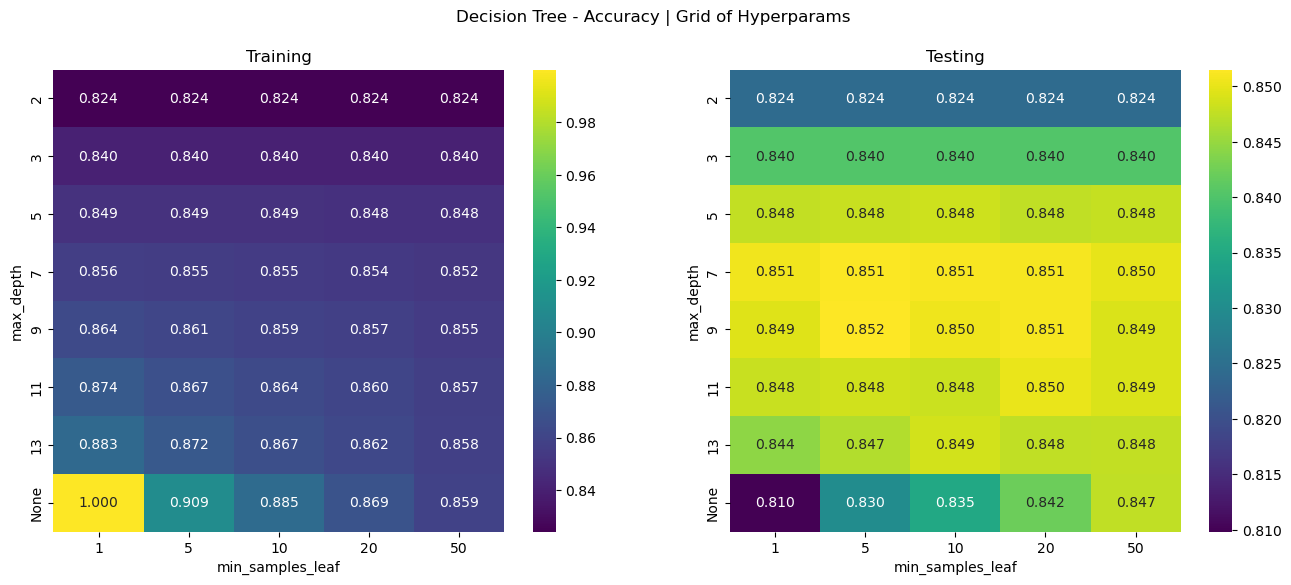

In [94]:
# ===== tune model - grid search CV =====
param_grid = {
    'criterion':['gini'],
    'max_depth': [2, 3, 5, 7, 9, 11, 13, None],
    'min_samples_leaf': [1, 5, 10, 20, 50],
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

grid.fit(X_tr, y_tr);

results_df = pd.DataFrame(grid.cv_results_)

# Viz - hyperparams vs training and testing error
def plot_dt():
    df1 = results_df.copy()
    df1['param_max_depth'] = df1['param_max_depth'].apply(lambda x: 'None' if x is None else int(x))
    df1['param_min_samples_leaf'] = df1['param_min_samples_leaf'].astype(int)

    heatmap_data_tr = df1.pivot_table(
        index='param_max_depth',
        columns='param_min_samples_leaf',
        values='mean_train_score'
    )

    heatmap_data_ts = df1.pivot_table(
        index='param_max_depth',
        columns='param_min_samples_leaf',
        values='mean_test_score'
    )

    fig, axes = plt.subplots(1,2,figsize=(16,6))
    sns.heatmap(heatmap_data_tr, annot=True, fmt=".3f", cmap='viridis', ax=axes[0])
    axes[0].set_title('Training')
    axes[0].set_xlabel('min_samples_leaf')
    axes[0].set_ylabel('max_depth')
    sns.heatmap(heatmap_data_ts, annot=True, fmt=".3f", cmap='viridis', ax=axes[1])
    axes[1].set_title('Testing')
    axes[1].set_xlabel('min_samples_leaf')
    axes[1].set_ylabel('max_depth')

    plt.suptitle('Decision Tree - Accuracy | Grid of Hyperparams')
    plt.savefig('media/02_decision_tree_overfitting_viz')
    plt.show()
plot_dt()